In [2]:
import PIL
from PIL import Image
import pytesseract
import re
import os
import matplotlib.pyplot as plt

PIL.Image.MAX_IMAGE_PIXELS = None #Increase image size limit

10336 16224


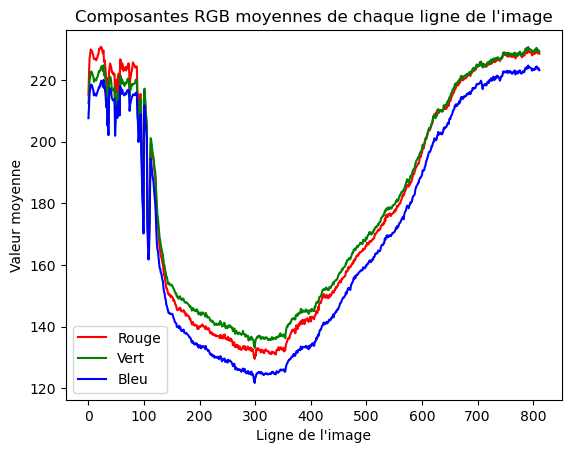

In [37]:
# Ouvrir l'image
img = Image.open("/Users/titouanlegourrierec/Desktop/all_scan_data/all_090523/100.jpg")

# Obtenir les dimensions de l'image
width, height = img.size
print(width,height)

pas_ligne = 20
pas_pixel = 20

# Listes pour stocker les valeurs moyennes de chaque composante RGB
red_avg = []
green_avg = []
blue_avg = []

# Parcourir chaque ligne de l'image
for y in range(0, height, pas_ligne):
    # Initialiser les valeurs moyennes des composantes RGB pour cette ligne
    red_sum = 0
    green_sum = 0
    blue_sum = 0
    
    # Parcourir chaque pixel de cette ligne et ajouter ses composantes RGB à la somme
    for x in range(0, width, pas_pixel):
        pixel = img.getpixel((x, y))
        red_sum += pixel[0]
        green_sum += pixel[1]
        blue_sum += pixel[2]
    
    # Calculer la moyenne des composantes RGB pour cette ligne
    red_avg.append(red_sum / (width/pas_pixel))
    green_avg.append(green_sum / (width/pas_pixel))
    blue_avg.append(blue_sum / (width/pas_pixel))

# Tracer les valeurs moyennes obtenues pour chaque composante RGB
plt.plot(red_avg, color='red', label='Rouge')
plt.plot(green_avg, color='green', label='Vert')
plt.plot(blue_avg, color='blue', label='Bleu')
plt.xlabel('Ligne de l\'image')
plt.ylabel('Valeur moyenne')
plt.title('Composantes RGB moyennes de chaque ligne de l\'image')
plt.legend()
plt.show()

10336 17584
2100


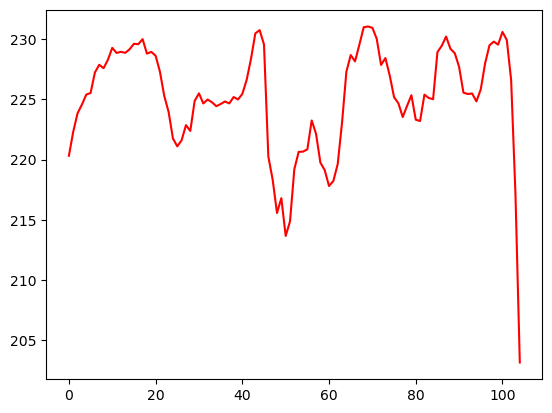

In [3]:
# Ouvrir l'image
img = Image.open("/Users/titouanlegourrierec/Desktop/Test ilastic/49.jpg")

# Obtenir les dimensions de l'image
width, height = img.size
print(width,height)

pas_ligne = 20
pas_pixel = 20

# Listes pour stocker les valeurs moyennes de chaque composante RGB
avg = []

# Parcourir chaque ligne de l'image
for y in range(0, height, pas_ligne):
    # Initialiser les valeurs moyennes des composantes RGB pour cette ligne
    sum = 0
    
    # Parcourir chaque pixel de cette ligne et ajouter ses composantes RGB à la somme
    for x in range(0, width, pas_pixel):
        pixel = img.getpixel((x, y))
        sum += (pixel[0] + pixel[0] + pixel[0])/3
    
    # Calculer la moyenne des composantes RGB pour cette ligne
    avg_y = sum / (width/pas_pixel)
    if avg_y < 150:
        y_break = y
        print(y_break)
        break

    # Calculer la moyenne des composantes RGB pour cette ligne
    avg.append(avg_y)

# Tracer les valeurs moyennes obtenues pour chaque composante RGB
plt.plot(avg, color='red')
plt.show()

In [4]:
img_c = img.crop((0,y_break,width, height))#.convert('L')
img_c.show()

In [4]:
# Ouvrir l'image
img = Image.open("/Users/titouanlegourrierec/Desktop/all_scan_data/all_090523/108.jpg")

width, height = img.size

pas_ligne = 20
pas_pixel = 20

avg = []

# Variables pour suivre l'état actuel et précédent de avg_y
previous_avg_y = None
first_time_below_150 = None
first_time_above_150_after_below_150 = None

for y in range(0, height, pas_ligne):
    sum = 0
    for x in range(0, width, pas_pixel):
        pixel = img.getpixel((x, y))
        sum += (pixel[0] + pixel[0] + pixel[0])/3
    
    avg_y = sum / (width/pas_pixel)

    # Calculer la moyenne des composantes RGB pour cette ligne
    avg.append(avg_y)
    
    # Vérifier si avg_y devient inférieur à 150 pour la première fois
    if avg_y < 180 and first_time_below_150 is None:
        first_time_below_150 = y
    
    # Vérifier si avg_y redevient supérieur à 150 après avoir été inférieur à 150
    if avg_y > 220 and first_time_below_150 is not None and first_time_above_150_after_below_150 is None:
        first_time_above_150_after_below_150 = y+1000
        break  # Sortir de la boucle pour arrêter le calcul après avoir trouvé la première fois que avg_y redevient supérieur à 150

# Imprimer les résultats
print("Première fois que avg_y devient inférieur à 150 :", first_time_below_150)
print("Première fois que avg_y redevient supérieur à 150 après avoir été inférieur à 150 :", first_time_above_150_after_below_150)

img_good = img.crop((0,first_time_below_150,width, height)).convert('L')
img_good.show()


Première fois que avg_y devient inférieur à 150 : 3280
Première fois que avg_y redevient supérieur à 150 après avoir été inférieur à 150 : 14500


In [19]:
img_good = img.crop((0,first_time_below_150,width, first_time_above_150_after_below_150)).convert('L')
img_good.show()

In [9]:
# Obtenir les dimensions de l'image
largeur, hauteur = img_good.size

# Calculer la largeur de chaque partie
largeur_partie = largeur // 5

# Créer une liste pour stocker les parties découpées
parties = []

# Découper l'image en 5 parties égales sur la largeur
for i in range(5):
    gauche = i * largeur_partie
    droite = (i + 1) * largeur_partie
    partie = img_good.crop((gauche, 0, droite, hauteur))
    parties.append(partie)

# Enregistrer chaque partie découpée
for i, partie in enumerate(parties):
    partie.save(f"/Users/titouanlegourrierec/Desktop/results/partie_{i + 1}.jpg")

# resize width

2067 13180


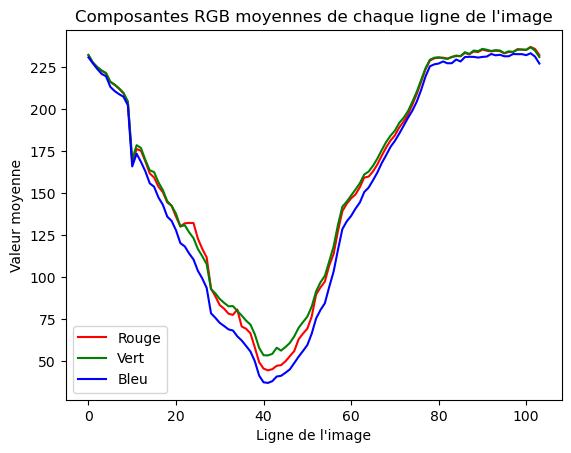

In [8]:
# Ouvrir l'image
img = Image.open("/Users/titouanlegourrierec/Desktop/results/partie_1.jpg")

# Obtenir les dimensions de l'image
width, height = img.size
print(width,height)

pas_ligne = 20
pas_pixel = 20

# Listes pour stocker les valeurs moyennes de chaque composante RGB
red_avg = []
green_avg = []
blue_avg = []

# Parcourir chaque ligne de l'image
for x in range(0, width, pas_ligne):
    # Initialiser les valeurs moyennes des composantes RGB pour cette ligne
    red_sum = 0
    green_sum = 0
    blue_sum = 0
    
    # Parcourir chaque pixel de cette ligne et ajouter ses composantes RGB à la somme
    for y in range(0, height, pas_pixel):
        pixel = img.getpixel((x, y))
        red_sum += pixel[0]
        green_sum += pixel[1]
        blue_sum += pixel[2]
    
    # Calculer la moyenne des composantes RGB pour cette ligne
    red_avg.append(red_sum / (height/pas_pixel))
    green_avg.append(green_sum / (height/pas_pixel))
    blue_avg.append(blue_sum / (height/pas_pixel))

# Tracer les valeurs moyennes obtenues pour chaque composante RGB
plt.plot(red_avg, color='red', label='Rouge')
plt.plot(green_avg, color='green', label='Vert')
plt.plot(blue_avg, color='blue', label='Bleu')
plt.xlabel('Ligne de l\'image')
plt.ylabel('Valeur moyenne')
plt.title('Composantes RGB moyennes de chaque ligne de l\'image')
plt.legend()
plt.show()

In [9]:
# Ouvrir l'image
img = Image.open("/Users/titouanlegourrierec/Desktop/results/partie_1.jpg")

width, height = img.size

pas_colonne = 20
pas_pixel = 20

avg = []

# Variables pour suivre l'état actuel et précédent de avg_x
previous_avg_x = None
first_time_below_150 = None
first_time_above_150_after_below_150 = None

for x in range(0, width, pas_colonne):
    sum = 0
    for y in range(0, height, pas_pixel):
        pixel = img.getpixel((x, y))
        sum += (pixel[0] + pixel[0] + pixel[0])/3
    
    avg_x = sum / (height/pas_pixel)

    # Calculer la moyenne des composantes RGB pour cette colonne
    avg.append(avg_x)
    
    # Vérifier si avg_x devient inférieur à 150 pour la première fois
    if avg_x < 175 and first_time_below_150 is None:
        first_time_below_150 = x
    
    # Vérifier si avg_x redevient supérieur à 150 après avoir été inférieur à 150
    if avg_x > 230 and first_time_below_150 is not None and first_time_above_150_after_below_150 is None:
        first_time_above_150_after_below_150 = x
        break  # Sortir de la boucle pour arrêter le calcul après avoir trouvé la première fois que avg_x redevient supérieur à 150

# Imprimer les résultats
print("Première fois que avg_x devient inférieur à 150 :", first_time_below_150)
print("Première fois que avg_x redevient supérieur à 150 après avoir été inférieur à 150 :", first_time_above_150_after_below_150)

Première fois que avg_x devient inférieur à 150 : 200
Première fois que avg_x redevient supérieur à 150 après avoir été inférieur à 150 : 1580


In [10]:
img_good = img.crop((first_time_below_150-50,0,first_time_above_150_after_below_150+50, height))#.convert('L')
img_good.show()